# Comparing survey coverages

In notebook 1 we created tables with the file image corners and sizes. In this notebook we will look at their location on teh sky. The original notebook took the first image. Perhaps we will want to rerun it and get all the ccd corners. Although the tiles should tell use the coverage of individual ccds. WE need to figure out how to get the pointings from tiles.

In [1]:
from astropy.table import Table, Column, vstack # Perhaps we should use LSST tables

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
video_ims = Table.read('./data/video_images_overview.csv')
vhs_ims = Table.read('./data/vhs_images_overview.csv')
hsc_ims = Table.read('./data/hsc_images_overview.csv')

In [3]:
vista_ims = vstack([video_ims,vhs_ims])

In [4]:
len(vista_ims)

569008

In [5]:
len(vhs_ims)

568965

In [6]:
len(video_ims)

43

In [7]:
len(hsc_ims)

53298

In [8]:
vista_ims.add_column(Column(
    data= [t.split('/')[-2] for t in vista_ims['file']],
    name='date'))

In [9]:
def fileToSurvey(filename):
    survey = ''
    surveys = ['VIDEO', 'VHS', 'VIKING', 'VEILS']
    for f in surveys:
        if f in filename:
            survey = f
    return survey
    
vista_ims['survey'] = [fileToSurvey(t) for t in vista_ims['file']]

In [10]:
def fileToType(filename):
    filetype = ''
    types = {
        'tile':'_tl.fit',
        'stack':'_st.fit',
    }
    for k,v in types.items():
        #print(k,v)
        if filename.endswith(v):
            filetype = k
       
    return filetype
vista_ims['type'] = [fileToType(f) for f in vista_ims['file']]

In [11]:
vista_ims[:10].show_in_notebook()

idx,file,ra,dec,ra_0_0,ra_0_y,ra_x_0,ra_x_y,dec_0_0,dec_0_y,dec_x_0,dec_x_y,filter,size,hash,date,survey,type
0,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00102_st.fit,35.616442,-4.72313,36.12365296903962,36.12552008187017,35.92586958047189,35.92719310164043,-4.077977314187725,-4.276795598599529,-4.077171797589524,-4.276339668965059,Ks,84542400,3319fb54e5a06ed024ee2c779d3eea16,20121122,VIDEO,stack
1,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00235_st.fit,35.611492,-4.90492,36.12610999045986,36.12799560019295,35.92567612832217,35.927013085064964,-4.260849258430862,-4.458864267061002,-4.26000521655501,-4.458377949976223,Ks,86400000,3311861dca0dc2cc4c591c74ade46697,20121122,VIDEO,stack
2,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00088_st_tl.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20121122,VIDEO,tile
3,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00214_st_tl.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20121122,VIDEO,tile
4,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00207_st.fit,35.436996,-4.90735,35.94415038681624,35.946083891256066,35.74415693249861,35.74553771326806,-4.25982111275322,-4.458153923454694,-4.259167034486192,-4.457851984006502,Ks,87131520,30c4cf93b9f0f0cf0d3261792887984c,20121122,VIDEO,stack
5,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00186_st.fit,35.620817,-4.72418,36.1273099599587,36.129253995984364,35.927356864252125,35.928750217721166,-4.076418668899508,-4.2747963003828655,-4.075634526012312,-4.274362759715051,Ks,86996160,f2d7ce96af8ba0e7dacad9502b130968,20121122,VIDEO,stack
6,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00151_st.fit,35.619563,-4.91269,36.12897457417563,36.1309440114325,35.926964033757244,35.92836295863879,-4.25902765584969,-4.4604201350789845,-4.258262828599911,-4.460015583328658,Ks,87891840,b31848fb6f8fda487334ad79edf9f671,20121122,VIDEO,stack
7,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00116_st.fit,35.524558,-4.90631,36.03226173409147,36.03414857812651,35.834395481720996,35.83573620433609,-4.260776925843634,-4.459607645003357,-4.259978566975024,-4.459159214724387,Ks,84648960,a48b9f8674556a541dc64ae56646d847,20121122,VIDEO,stack
8,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00179_st.fit,35.528933,-4.72417,36.036102623233226,36.038019421876925,35.83608127168605,35.83744677984761,-4.075840155220711,-4.27419221211796,-4.075110862928901,-4.273814512007562,Ks,86526720,ab1338e0fca179e1783af7e2d9a78187,20121122,VIDEO,stack
9,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00130_st.fit,35.435729,-4.72953,35.94541034612505,35.94739404313425,35.74341133771648,35.7448269875313,-4.0761093665967385,-4.277639042080953,-4.075351693245579,-4.277242337224645,Ks,88286400,2def2dc5fa82d81c006112aa76b725ab,20121122,VIDEO,stack


In [12]:
np.sum(vista_ims['type'] == 'stack')

131440

In [13]:
#Date range of observations
(np.min(vista_ims['date'][vista_ims['survey'] == 'VIDEO'].astype(int)), 
np.max(vista_ims['date'][vista_ims['survey'] == 'VIDEO'].astype(int)))

(20121122, 20171027)

In [14]:
vista_ims[-15:].show_in_notebook()

idx,file,ra,dec,ra_0_0,ra_0_y,ra_x_0,ra_x_y,dec_0_0,dec_0_y,dec_x_0,dec_x_y,filter,size,hash,date,survey,type
0,/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140217/v20140217_00271.fit,181.435454,-53.14541,182.2699684256211,182.27508947891405,181.95473142042866,181.95770976393467,-52.500334487275154,-52.691661599656214,-52.50051135075514,-52.69217903289173,J,73728000,730416b224f9b934da710a6770337d3a,20140217,VHS,
1,/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140217/v20140217_00253_st_conf.fit,163.755087,-32.91194,164.3520240174799,164.35570543667168,164.1184643820727,164.1210603126868,-32.2660963747985,-32.46300877975218,-32.26637724257059,-32.46364426169791,J,31046400,beea31eb8137a152bdc73c79261d87c8,20140217,VHS,
2,/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140217/v20140217_00249_st_conf.fit,163.645883,-32.912,164.24397687889805,164.24742058383342,164.01043222454663,164.012789752506,-32.26664552513899,-32.46365979897796,-32.26668703984101,-32.464055134522155,J,30977280,b473697810ace78260ba50cf16a0ec2a,20140217,VHS,
3,/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140217/v20140217_00303.fit,172.778062,-32.72868,173.37524373208828,173.37826754342257,173.14875042099698,173.15075057467376,-32.08353724384342,-32.274872525972924,-32.08338256135142,-32.275051305217474,J,72855360,acc79f38544c86b0f0c6e311dca5a92e,20140217,VHS,
4,/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140217/v20140217_00267_st_conf.fit,181.740187,-53.14543,182.5684104871822,182.57571865223184,182.24400437178605,182.24905062242806,-52.497518927023314,-52.69450922592677,-52.49890513826607,-52.69626411860069,Ks,29664000,c61c3ae84e31c269ea1139040a1d81f5,20140217,VHS,
5,/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140217/v20140217_00303.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20140217,VHS,
6,/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140217/v20140217_00267_st_conf.fit,181.740187,-53.14543,182.5684104871822,182.57571865223184,182.24400437178605,182.24905062242806,-52.497518927023314,-52.69450922592677,-52.49890513826607,-52.69626411860069,Ks,29664000,c61c3ae84e31c269ea1139040a1d81f5,20140217,VHS,
7,r-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140217/v20140217_00267_st_conf.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20140217,VHS,
8,ir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140217/v20140217_00267_st_conf.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20140217,VHS,
9,r-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140217/v20140217_00267_st_conf.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20140217,VHS,


In [15]:
np.sum(np.isnan(vista_ims['ra']))

43681

In [16]:
vista_ims[np.isnan(vista_ims['ra'])][:10]

file,ra,dec,ra_0_0,ra_0_y,ra_x_0,ra_x_y,dec_0_0,dec_0_y,dec_x_0,dec_x_y,filter,size,hash,date,survey,type
str101,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,int64,str32,str8,str5,str5
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00088_st_tl.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20121122,VIDEO,tile
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00214_st_tl.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20121122,VIDEO,tile
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00130_st_tl.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20121122,VIDEO,tile
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00172_st_tl.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20121122,VIDEO,tile
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20171027/v20171027_00133_st_tl.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20171027,VIDEO,tile
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20171027/v20171027_00181_st_tl.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20171027,VIDEO,tile
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140924/v20140924_00570_st_tl.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20140924,VHS,tile
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140924/v20140924_00582_st_tl_conf.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20140924,VHS,
/home/ir-shir1/rds/rds-iris-ip005/data/private/VISTA/VHS/20140924/v20140924_00606_st_tl.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20140924,VHS,tile


In [17]:
def plot_mwd(RA,Dec,org=0,title='Object positions', projection='mollweide'):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection)
    ax.scatter(np.radians(x),np.radians(Dec))  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)

/Users/rs548/GitHub/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


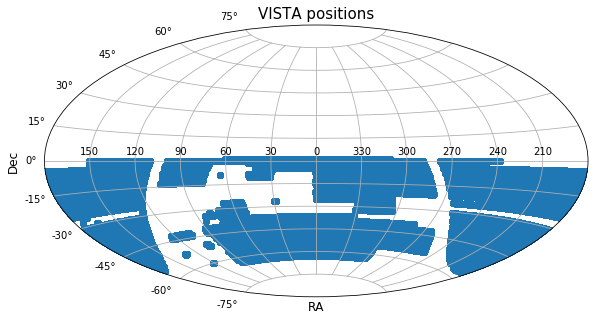

In [18]:
plot_mwd(vista_ims['ra_0_0'], vista_ims['dec_0_0'], title='VISTA positions', projection='aitoff')
plt.savefig('./data/vista_coverage.png')

These appear to not show the VHS full coverage. Is this because we are looking at DR1

![](./figs/VISTA-Status-20190620.png)

In [19]:
np.sum(np.isnan(vista_ims['dec_0_0']))

43681

In [20]:
vista_ims[~np.isnan(vista_ims['dec_0_0'])]

file,ra,dec,ra_0_0,ra_0_y,ra_x_0,ra_x_y,dec_0_0,dec_0_y,dec_x_0,dec_x_y,filter,size,hash,date,survey,type
str101,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,int64,str32,str8,str5,str5
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00102_st.fit,35.616442,-4.72313,36.12365296903962,36.12552008187017,35.92586958047189,35.92719310164043,-4.077977314187725,-4.276795598599529,-4.077171797589524,-4.276339668965059,Ks,84542400,3319fb54e5a06ed024ee2c779d3eea16,20121122,VIDEO,stack
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00235_st.fit,35.611492,-4.90492,36.12610999045986,36.12799560019295,35.92567612832217,35.927013085064964,-4.260849258430862,-4.458864267061002,-4.26000521655501,-4.458377949976223,Ks,86400000,3311861dca0dc2cc4c591c74ade46697,20121122,VIDEO,stack
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00207_st.fit,35.436996,-4.90735,35.94415038681624,35.946083891256066,35.74415693249861,35.74553771326806,-4.25982111275322,-4.458153923454694,-4.259167034486192,-4.457851984006502,Ks,87131520,30c4cf93b9f0f0cf0d3261792887984c,20121122,VIDEO,stack
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00186_st.fit,35.620817,-4.72418,36.1273099599587,36.129253995984364,35.927356864252125,35.928750217721166,-4.076418668899508,-4.2747963003828655,-4.075634526012312,-4.274362759715051,Ks,86996160,f2d7ce96af8ba0e7dacad9502b130968,20121122,VIDEO,stack
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00151_st.fit,35.619563,-4.91269,36.12897457417563,36.1309440114325,35.926964033757244,35.92836295863879,-4.25902765584969,-4.4604201350789845,-4.258262828599911,-4.460015583328658,Ks,87891840,b31848fb6f8fda487334ad79edf9f671,20121122,VIDEO,stack
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00116_st.fit,35.524558,-4.90631,36.03226173409147,36.03414857812651,35.834395481720996,35.83573620433609,-4.260776925843634,-4.459607645003357,-4.259978566975024,-4.459159214724387,Ks,84648960,a48b9f8674556a541dc64ae56646d847,20121122,VIDEO,stack
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00179_st.fit,35.528933,-4.72417,36.036102623233226,36.038019421876925,35.83608127168605,35.83744677984761,-4.075840155220711,-4.27419221211796,-4.075110862928901,-4.273814512007562,Ks,86526720,ab1338e0fca179e1783af7e2d9a78187,20121122,VIDEO,stack
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00130_st.fit,35.435729,-4.72953,35.94541034612505,35.94739404313425,35.74341133771648,35.7448269875313,-4.0761093665967385,-4.277639042080953,-4.075351693245579,-4.277242337224645,Ks,88286400,2def2dc5fa82d81c006112aa76b725ab,20121122,VIDEO,stack
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00165_st.fit,35.435704,-4.9127,35.94561871123936,35.94765256521272,35.74363364276948,35.74509765698566,-4.259284945697468,-4.460698118492988,-4.258674764519787,-4.4604498842183045,Ks,87626880,f59516da74921bc5cedf5feb4a38e12f,20121122,VIDEO,stack


I was expecting the VHS images to be all sky. Perhaps I am having an issue opening those files

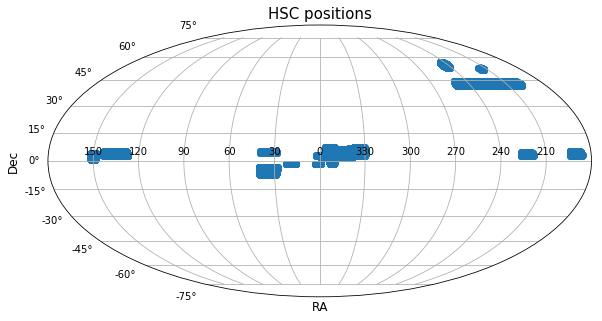

In [21]:
plot_mwd(hsc_ims['ra_0_0'], hsc_ims['dec_0_0'], title='HSC positions')

# Get fields

We want to look at the XMM-LSS field as a test. Lets get all the files in XMM-LSS and choose a set as our practice images

## Select test region

We want an area in XMM-LSS with VIDEO and HSC DUD data. Let us choose a HSC tract (composed of nine patches) and get a list of file names to move to our local repository for processing.

A point in SXDS is 35.0, -4.0

In [22]:
ra_test, dec_test = 35.0,  -4.0

In [23]:
#First lets get the HSC tract containing that point
#For now lets just assume the images are lined up with the axes
in_im = (
    (ra_test < hsc_ims['ra_0_0']) &
    (dec_test > hsc_ims['dec_0_0']) &
    (ra_test > hsc_ims['ra_x_y']) &
    (dec_test < hsc_ims['dec_x_y']) )

print(np.sum(in_im))
    

40


In [24]:
hsc_ims[in_im]

file,ra_0_0,ra_0_y,ra_x_0,ra_x_y,dec_0_0,dec_0_y,dec_x_0,dec_x_y,size,hash
str164,float64,float64,float64,float64,float64,float64,float64,float64,int64,str32
"/home/ir-shir1/rds/rds-iris-ip005/data/public/HSC/hsc-release.mtk.nao.ac.jp/archive/filetree/pdr2_dud/deepCoadd-results/HSC-Z/8765/0,3/calexp-HSC-Z-8765-0,3.fits",35.056859995378,35.05667278346978,34.865093653377386,34.86494907158138,-4.003241696593322,-3.8072651168892024,-4.00341561935237,-3.8074305032734497,141505920,ddcd8c638f16208db848385c00d1b817
"/home/ir-shir1/rds/rds-iris-ip005/data/public/HSC/hsc-release.mtk.nao.ac.jp/archive/filetree/pdr2_dud/deepCoadd-results/HSC-Z/8765/0,2/calexp-HSC-Z-8765-0,2.fits",35.05703836986104,35.05685107863718,34.86523141012769,34.8650867670717,-4.1898799341053765,-3.9939095932239588,-4.190061985963134,-3.994083109503531,163016640,0ce608368f49e49a5d04ed98d1e4dda3
"/home/ir-shir1/rds/rds-iris-ip005/data/public/HSC/hsc-release.mtk.nao.ac.jp/archive/filetree/pdr2_dud/deepCoadd-results/HSC-Z/8766/8,2/calexp-HSC-Z-8766-8,2.fits",35.05212396177302,35.052268604829,34.86031700203964,34.86050429326351,-4.190061985963127,-3.9940831095035314,-4.189879934105375,-3.9939095932239557,163609920,414f501c865410b188c2e98c08f142ab
"/home/ir-shir1/rds/rds-iris-ip005/data/public/HSC/hsc-release.mtk.nao.ac.jp/archive/filetree/pdr2_dud/deepCoadd-results/HSC-Z/8766/8,3/calexp-HSC-Z-8766-8,3.fits",35.052261718523305,35.052406300319326,34.86049537652268,34.86068258843092,-4.003415619352376,-3.8074305032734497,-4.003241696593322,-3.8072651168892,141289920,163b09282be3e840300537ceff30a341
"/home/ir-shir1/rds/rds-iris-ip005/data/public/HSC/hsc-release.mtk.nao.ac.jp/archive/filetree/pdr2_dud/deepCoadd-results/HSC-G/8765/0,3/calexp-HSC-G-8765-0,3.fits",35.056859995378,35.05667278346978,34.865093653377386,34.86494907158138,-4.003241696593322,-3.8072651168892024,-4.00341561935237,-3.8074305032734497,134055360,c328249a04c41efa1147f125d9cefa27
"/home/ir-shir1/rds/rds-iris-ip005/data/public/HSC/hsc-release.mtk.nao.ac.jp/archive/filetree/pdr2_dud/deepCoadd-results/HSC-G/8765/0,2/calexp-HSC-G-8765-0,2.fits",35.05703836986104,35.05685107863718,34.86523141012769,34.8650867670717,-4.1898799341053765,-3.9939095932239588,-4.190061985963134,-3.994083109503531,143435520,d8e55ee7636a3372638af4acf74cc112
"/home/ir-shir1/rds/rds-iris-ip005/data/public/HSC/hsc-release.mtk.nao.ac.jp/archive/filetree/pdr2_dud/deepCoadd-results/HSC-G/8766/8,2/calexp-HSC-G-8766-8,2.fits",35.05212396177302,35.052268604829,34.86031700203964,34.86050429326351,-4.190061985963127,-3.9940831095035314,-4.189879934105375,-3.9939095932239557,143732160,2dabd20ddbd2fab92c29c2a47bca6c44
"/home/ir-shir1/rds/rds-iris-ip005/data/public/HSC/hsc-release.mtk.nao.ac.jp/archive/filetree/pdr2_dud/deepCoadd-results/HSC-G/8766/8,3/calexp-HSC-G-8766-8,3.fits",35.052261718523305,35.052406300319326,34.86049537652268,34.86068258843092,-4.003415619352376,-3.8074305032734497,-4.003241696593322,-3.8072651168892,134046720,597ad322a54f519f72a0ba36e9b773d7
"/home/ir-shir1/rds/rds-iris-ip005/data/public/HSC/hsc-release.mtk.nao.ac.jp/archive/filetree/pdr2_dud/deepCoadd-results/HSC-I/8765/0,3/calexp-HSC-I-8765-0,3.fits",35.056859995378,35.05667278346978,34.865093653377386,34.86494907158138,-4.003241696593322,-3.8072651168892024,-4.00341561935237,-3.8074305032734497,125611200,fa2c3cca1aa531bd34a90abfa9753e92


This point apears to be in the overlap region between tract 8523 and 8524. Lets choose 8523 arbitraily. Each tract contains 9*9 = 81 patches. Lets try to process one patch to begin. We therefor want all the VISTA images that overlap with one patch. Lets arbitrality take the first patch

In [25]:
#hsc_ims[in_im][0]

In [26]:
in_vista_im = (
    (ra_test < vista_ims['ra_0_0']) &
    (dec_test > vista_ims['dec_0_0']) &
    (ra_test > vista_ims['ra_x_y']) &
    (dec_test < vista_ims['dec_x_y']) )

print(np.sum(in_vista_im))

0


/Users/rs548/GitHub/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-1a1d771/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


In [27]:
def float_to_int(floats):
    floats = np.array(floats.copy())
    floats[np.isnan(floats)] = -99
    ints = np.array([int(f) for f in floats])
    return ints
close = (float_to_int( vista_ims['ra']) == int(ra_test)) & (float_to_int( vista_ims['dec']) == int(dec_test))

In [28]:
np.sum((float_to_int( vista_ims['dec']) == int(dec_test)))

133

In [29]:
np.unique(float_to_int( vista_ims['dec']))

array([-99, -63, -62, -61, -60, -59, -58, -57, -56, -54, -53, -51, -50,
       -48, -47, -46, -45, -44, -43, -42, -41, -40, -38, -37, -35, -34,
       -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -21, -19, -18,
       -16, -15, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
        -2,   0])

In [30]:
vista_ims[close][0]

file,ra,dec,ra_0_0,ra_0_y,ra_x_0,ra_x_y,dec_0_0,dec_0_y,dec_x_0,dec_x_y,filter,size,hash,date,survey,type
str101,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,int64,str32,str8,str5,str5
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00102_st.fit,35.616442,-4.72313,36.12365296903962,36.12552008187017,35.92586958047189,35.92719310164043,-4.077977314187725,-4.276795598599529,-4.077171797589524,-4.276339668965059,Ks,84542400,3319fb54e5a06ed024ee2c779d3eea16,20121122,VIDEO,stack


In [31]:
vista_ims[np.isclose(vista_ims['ra'], 35.428) & (vista_ims['filter'] == 'J')]

file,ra,dec,ra_0_0,ra_0_y,ra_x_0,ra_x_y,dec_0_0,dec_0_y,dec_x_0,dec_x_y,filter,size,hash,date,survey,type
str101,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,int64,str32,str8,str5,str5


In [32]:
np.unique(vista_ims[np.isclose(vista_ims['ra'], 35.428)]['filter'])

Ks


In [33]:
test_set = np.isclose(vista_ims['ra'], 35.428, atol=0.1)
test_set &= np.isclose(vista_ims['dec'], -4.90777, atol=0.1)
test_set &= (vista_ims['survey']== 'VIDEO')
#test_set &= (
#    (np.array(vista_ims['filter']) == 'Y') | 
#    (np.array(vista_ims['filter']) == 'Ks') 
#)

#test_set &=

In [34]:
np.unique(vista_ims[test_set]['date'])


20121122
20171027


In [35]:
np.sum(vista_ims[test_set &(vista_ims['type']=='stack')]['size'])

850599360

In [36]:
vista_ims[test_set &(vista_ims['type']=='stack')].show_in_notebook()

idx,file,ra,dec,ra_0_0,ra_0_y,ra_x_0,ra_x_y,dec_0_0,dec_0_y,dec_x_0,dec_x_y,filter,size,hash,date,survey,type
0,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00207_st.fit,35.436996,-4.90735,35.94415038681624,35.946083891256066,35.74415693249861,35.74553771326806,-4.25982111275322,-4.458153923454694,-4.259167034486192,-4.457851984006502,Ks,87131520,30c4cf93b9f0f0cf0d3261792887984c,20121122,VIDEO,stack
1,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00116_st.fit,35.524558,-4.90631,36.03226173409147,36.03414857812651,35.834395481720996,35.83573620433609,-4.260776925843634,-4.459607645003357,-4.259978566975024,-4.459159214724387,Ks,84648960,a48b9f8674556a541dc64ae56646d847,20121122,VIDEO,stack
2,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00165_st.fit,35.435704,-4.9127,35.94561871123936,35.94765256521272,35.74363364276948,35.74509765698566,-4.259284945697468,-4.460698118492988,-4.258674764519787,-4.4604498842183045,Ks,87626880,f59516da74921bc5cedf5feb4a38e12f,20121122,VIDEO,stack
3,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00242_st.fit,35.519567,-4.90494,36.03462911783436,36.03659155520072,35.83423558450388,35.83565018719635,-4.260864499424222,-4.458846009642759,-4.260043878490914,-4.458383394814115,Ks,86132160,30dc6c0720fecc343e7037583e2657cf,20121122,VIDEO,stack
4,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00158_st.fit,35.527642,-4.91272,36.0374114351255,36.03936021861576,35.83545453771271,35.83683273533792,-4.258752116030969,-4.460185522258053,-4.257936566923111,-4.4597300997089615,Ks,88053120,89a8864ed1c242b8fecc1562b892ea6c,20121122,VIDEO,stack
5,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00249_st.fit,35.427633,-4.90493,35.94287537092362,35.94475163389872,35.742420446203745,35.743748425144865,-4.261165633336233,-4.4591626315246415,-4.260401596591839,-4.458757586918079,Ks,86411520,27e65f1059bd076dbea3b79e8d53e565,20121122,VIDEO,stack
6,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20121122/v20121122_00123_st.fit,35.432625,-4.9063,35.94044296819832,35.94237419669329,35.74260946975893,35.74399541881637,-4.261384583389258,-4.460170054766773,-4.260724450373826,-4.459861003202436,Ks,84424320,80488596aedcf2fd07926f139f909716,20121122,VIDEO,stack
7,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20171027/v20171027_00173_st.fit,35.435225,-4.90779,35.943588982159184,35.945534640039945,35.74298527341724,35.744372243765596,-4.259059664741104,-4.458820336557813,-4.258365216461935,-4.458481834393038,Y,61666560,0ae44410a6d7f6fc317b233b9b5b714a,20171027,VIDEO,stack
8,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20171027/v20171027_00213_st.fit,35.525212,-4.90638,36.03748204073455,36.03938267195677,35.83466901967988,35.836005340341934,-4.258024543865595,-4.4579656850480625,-4.257153959023732,-4.457456529627805,Y,60860160,d56e745db72b84d12afc79ee76f99d5e,20171027,VIDEO,stack
9,/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20171027/v20171027_00165_st.fit,35.527158,-4.90781,36.03531006747089,36.03720753962785,35.83474228118,35.83608039124861,-4.258438926310406,-4.458239480930942,-4.257575477014601,-4.457730373880786,Y,61963200,6ab2e6c4c3da68d0b8875d65ede796fb,20171027,VIDEO,stack


In [37]:
np.sum(test_set &(vista_ims['type']=='stack')&(vista_ims['filter']=='J'))

0

In [38]:
np.unique(vista_ims[test_set &(vista_ims['type']=='stack')&(vista_ims['filter']=='J')]['date'])

<Column name='date' dtype='str8' length=0>

I want to choose a minimal test data set. That is I want a set of six stacks on the same position in the four VIDEO bands.

 - 20171027, Y images at 35.4, -4.9
 - 20121021, J
 - 20120924, H 
 - 20121122, Ks 
 
 look like two VIDEO tiles over the same area in Y and Ks

In [39]:
np.sum(vista_ims[test_set & (vista_ims['date']=='20121021')]['size'])

0

In [40]:
vista_ims[ (vista_ims['date']=='20171027') &(vista_ims['type']=='tile')]

file,ra,dec,ra_0_0,ra_0_y,ra_x_0,ra_x_y,dec_0_0,dec_0_y,dec_x_0,dec_x_y,filter,size,hash,date,survey,type
str101,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,int64,str32,str8,str5,str5
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20171027/v20171027_00133_st_tl.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20171027,VIDEO,tile
/Users/rs548/GitHub/lsst-ir-fusion/dmu0/dmu0_VISTA/dmu0_VIDEO/data/20171027/v20171027_00181_st_tl.fit,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,0,--,20171027,VIDEO,tile


In [41]:
np.sum((vista_ims['type']=='tile') & ~np.isnan(vista_ims['ra']))

0